<center>
<h1>🌱 Plant Disease Classification using Deep Learning 🍅🌿</h1>

</center>

<center>
<h1>🎯 Project Description</h1>

</center>



In this project, we'll leverage the power of Deep Learning to detect and classify various plant diseases. Specifically, we'll be focusing on diseases in tomato plants.

With climate change and the increasing demand for food production, it's essential to enhance our agricultural practices. Detecting plant diseases early can lead to timely treatment, preventing losses and ensuring better yields. However, manual disease detection can be time-consuming and requires expertise.

Enter Deep Learning! By training a model on images of plant leaves, we can automate the disease detection process, making it more efficient and accessible.

Our dataset contains images of tomato leaves and stucture of my folder is: 

<center>
<h1> I will go through the following steps:</h1>
</center>

* 🔍 Data Exploration - We'll visualize our data and check the distribution of different classes.
* 🧹 Data Preprocessing - We'll load and preprocess our image data to make it suitable for a neural network.
* 🛠 Model Building - We'll build a CNN model using TensorFlow and Keras.
* 🎯 Model Training - We'll train our model on our dataset, using a separate validation set to monitor its performance.
* 📊 Model Evaluation - We'll evaluate our model's performance on a separate test set.
* 🔄 Model Improvement - We'll try different strategies to improve our model's performance.
* 🖼️ Result Visualization - We'll visualize our results to make them interpretable.


In [1]:
# importing data analysis libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

2023-05-17 08:49:25.419734: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 08:49:25.421359: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 08:49:25.452915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 08:49:25.454377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 08:49:26.355144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# Defind paths and constans for the project

# Path
test_path = '../test_split/'
train_path = '../train_split/'

# Constants
BATCH_SIZE = 32
img_height = 180
img_width = 180

<center>
<h1> 🔍 Data Exploration</h1>
</center>

### It's a time to load and split data into and see how many pictures and classes do we have:
* Training
* Validation
* Test

In [4]:
# loading training data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size= (img_height, img_width),
    batch_size= BATCH_SIZE
)
train_data
class_names = train_data.class_names
print(f'Number of 🍅 classes names for training set: {class_names}')

Found 899 files belonging to 3 classes.
Using 720 files for training.
Number of 🍅 classes names for training set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [5]:
# loading  validation data
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE
)

validation_data
print(f'Number of 🍅 classes names for validation set: {validation_data.class_names}')

Found 899 files belonging to 3 classes.
Using 179 files for validation.
Number of 🍅 classes names for validation set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [6]:
# finding all categories belloging to each folder and tomato class

def print_classes(directory, txt = ''):
    categories = os.listdir(directory)
    print(f'Number of classes: {len(categories)}')
    print(f'Classes: {txt}')
    num_of_cat = []
    for category in categories:
        print(f'🍅: {category}')
        num_of_cat.append(category)
    return num_of_cat
        
print_classes(train_path, 'Train')
print('-' * 30)
print_classes(test_path, 'Test')

Number of classes: 3
Classes: Train
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight
------------------------------
Number of classes: 3
Classes: Test
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight


['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight']

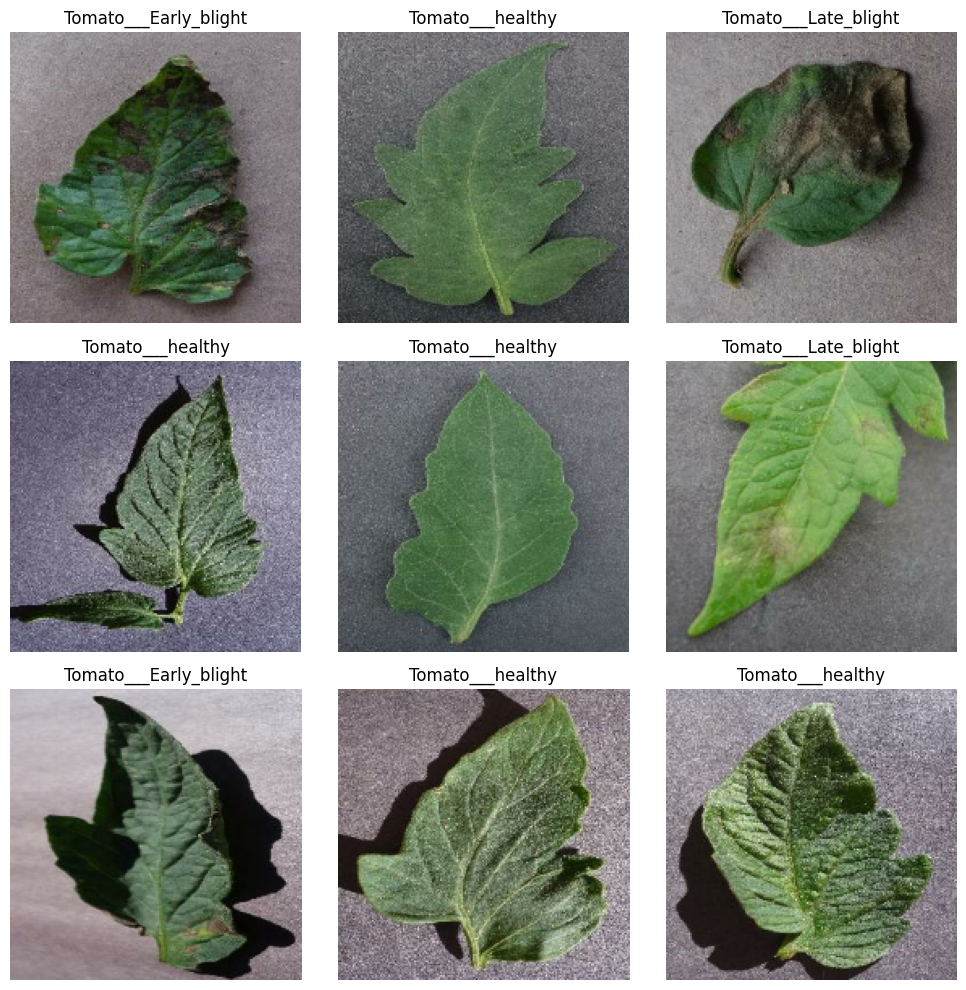

In [10]:
image_batch, label_batch = next(iter(train_data))


fig, axes = plt.subplots(3, 3, figsize = (10, 10))

axes = axes.flatten()

for i in range(9):
    axes[i].imshow(image_batch[i].numpy().astype('uint8'))
    axes[i].set_title(class_names[label_batch[i]])
    
    axes[i].axis('off')

plt.tight_layout()
plt.show()
    